Comprehensive Regularization Models:

- Baseline (No Regularization)
L1 Regularization
L2 Regularization
L1 and L2 Regularization
Dropout Regularization
Combined L1, L2, and Dropout Regularization

- Complex Dataset Features:

2000 samples
50 features
Non-linear interactions
Added noise
Class imbalance


- Training Enhancements:

Early stopping
Consistent evaluation metrics
Visualization of test accuracies


- Visualization:

Bar plot comparing test accuracies across different regularization techniques



- What to Look For:

Compare train and test accuracies
Note the accuracy differences (indicator of overfitting)
Observe how different regularization techniques impact model performance
- 
The script will:

Train each model
Print individual model performance
Generate a bar plot comparing test accuracies

Would you like me to explain the expected outcomes or elaborate on any of the regularization techniques?

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training: Baseline (No Regularization)
Baseline (No Regularization):
  Train Accuracy: 0.9256
  Test Accuracy:  0.7350
  Difference:     0.1906

Training: L1 Regularization
L1 Regularization:
  Train Accuracy: 0.9506
  Test Accuracy:  0.7450
  Difference:     0.2056

Training: L2 Regularization
L2 Regularization:
  Train Accuracy: 0.9075
  Test Accuracy:  0.7850
  Difference:     0.1225

Training: L1 and L2 Regularization
L1 and L2 Regularization:
  Train Accuracy: 0.9481
  Test Accuracy:  0.7250
  Difference:     0.2231

Training: Dropout Regularization
Dropout Regularization:
  Train Accuracy: 0.8275
  Test Accuracy:  0.7100
  Difference:     0.1175

Training: Combined L1, L2, and Dropout
Combined L1, L2, and Dropout:
  Train Accuracy: 0.9544
  Test Accuracy:  0.7275
  Difference:     0.2269


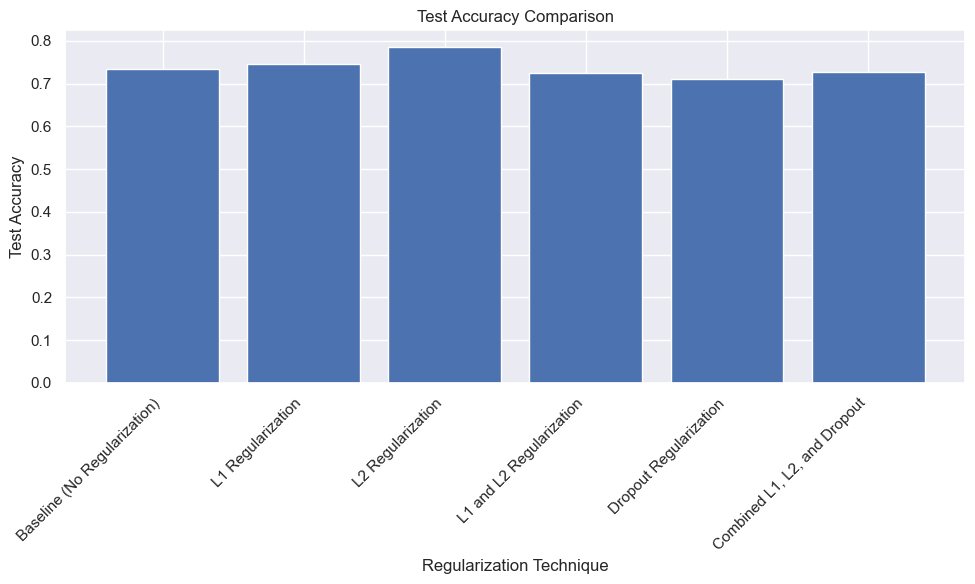

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Enhanced complex dataset generation
def create_complex_dataset():
    """
    Create a more complex synthetic classification dataset with:
    - Higher dimensionality
    - More redundant and informative features
    - Non-linear feature interactions
    - Class imbalance
    """
    # Generate base classification dataset
    X, y = make_classification(
        n_samples=2000,  # Increased sample size
        n_features=50,   # Increased feature dimensionality
        n_informative=15,  # More informative features
        n_redundant=10,    # More redundant features
        n_repeated=5,      # Add repeated features
        n_classes=2,       # Binary classification
        weights=[0.3, 0.7],  # Class imbalance
        hypercube=False,   # More complex feature space
        random_state=42
    )
    
    # Add non-linear feature interactions
    def add_non_linear_interactions(X):
        # Polynomial interactions
        X_poly = np.copy(X)
        
        # Quadratic interactions between some features
        for i in range(X.shape[1] - 1):
            for j in range(i+1, X.shape[1]):
                X_poly = np.column_stack([
                    X_poly, 
                    X[:, i] ** 2 + X[:, j] ** 2,  # Quadratic interaction
                    np.sin(X[:, i]) * np.cos(X[:, j])  # Non-linear interaction
                ])
        
        return X_poly
    
    # Add noise and non-linear transformations
    def add_noise_and_transformations(X):
        noise = np.random.normal(0, 0.5, X.shape)
        X_noisy = X + noise
        
        # Additional non-linear transformations
        X_transformed = np.column_stack([
            X_noisy,
            np.exp(X_noisy[:, :5]),  # Exponential of first 5 features
            np.log(np.abs(X_noisy[:, 5:10]) + 1)  # Log transformation
        ])
        
        return X_transformed
    
    # Apply transformations
    X_complex = add_non_linear_interactions(X)
    X_complex = add_noise_and_transformations(X_complex)
    
    return train_test_split(X_complex, y, test_size=0.2, random_state=42)

# Preprocessing function
def preprocess_data(X_train, X_test):
    """
    Standardize the features
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# 1. Baseline Model (No Regularization)
def create_baseline_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# 2. L1 Regularization Model
def create_l1_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, 
                     activation='relu', 
                     input_shape=(input_shape,),
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(32, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(16, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# 3. L2 Regularization Model
def create_l2_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, 
                     activation='relu', 
                     input_shape=(input_shape,),
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(32, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(16, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# 4. L1 and L2 Regularization Model
def create_l1_l2_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, 
                     activation='relu', 
                     input_shape=(input_shape,),
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dense(32, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dense(16, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# 5. Dropout Regularization Model
def create_dropout_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# 6. Combined L1, L2, and Dropout Regularization Model
def create_combined_regularization_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, 
                     activation='relu', 
                     input_shape=(input_shape,),
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dropout(0.3),
        layers.Dense(32, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dropout(0.2),
        layers.Dense(16, 
                     activation='relu', 
                     kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005)),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# Main execution function
def main():
    # Load and preprocess complex data
    X_train, X_test, y_train, y_test = create_complex_dataset()
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)
    
    # Model training parameters
    epochs = 100
    batch_size = 64
    
    # Early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    # Models to train
    models = {
        'Baseline (No Regularization)': create_baseline_model(X_train_scaled.shape[1]),
        'L1 Regularization': create_l1_model(X_train_scaled.shape[1]),
        'L2 Regularization': create_l2_model(X_train_scaled.shape[1]),
        'L1 and L2 Regularization': create_l1_l2_model(X_train_scaled.shape[1]),
        'Dropout Regularization': create_dropout_model(X_train_scaled.shape[1]),
        'Combined L1, L2, and Dropout': create_combined_regularization_model(X_train_scaled.shape[1])
    }
    
    # Results storage
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining: {name}")
        
        # Fit the model
        history = model.fit(
            X_train_scaled, y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=0
        )
        
        # Evaluate on training and test sets
        train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
        
        # Store results
        results[name] = {
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Accuracy Difference': abs(train_accuracy - test_accuracy),
            'Training History': history.history
        }
        
        # Print results
        print(f"{name}:")
        print(f"  Train Accuracy: {train_accuracy:.4f}")
        print(f"  Test Accuracy:  {test_accuracy:.4f}")
        print(f"  Difference:     {abs(train_accuracy - test_accuracy):.4f}")
    
    # Visualize results
    plt.figure(figsize=(10, 6))
    accuracies = [results[model]['Test Accuracy'] for model in models]
    model_names = list(models.keys())
    
    plt.bar(model_names, accuracies)
    plt.title('Test Accuracy Comparison')
    plt.xlabel('Regularization Technique')
    plt.ylabel('Test Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return results

# Run the main function
if __name__ == '__main__':
    results = main()

### The helps provide more insights into how different regularization techniques affect model performance:

Train Accuracy shows how well the model fits the training data
Test Accuracy shows the model's generalization performance
Accuracy Difference indicates potential overfitting or underfitting

The code now prints out more detailed information for each regularization method, allowing for a more comprehensive comparison of their effects on the model's performance.
